<a href="https://colab.research.google.com/github/SamuelBFG/DL-studies/blob/master/kappaMu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [245]:
from scipy import special as sp
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
from scipy.stats import gaussian_kde as kdf

class KappaMu():
    "KappaMu fading distribution"
    r = np.linspace(0, 3, 3000) # theoretical envelope PDF x axes
    def __init__(self, kappa, mu, r_hat, numSamples, numSim):
      # Parameters
      self.kappa = kappa
      self.mu = mu
      self.r_hat = r_hat  
      self.numSamples = numSamples
      self.numSim = numSim

      # For simulated densities
      self.generateSamples = self.generateSamples()
      self.X, self.Y = self.envelopeDensity(self.numSamples)

    def _pdf(self):
      A = (2*self.mu * ((1 + self.kappa)**((self.mu+1)/2))) \
              /((self.kappa**((self.mu - 1)/2)) * np.exp(self.mu * self.kappa))
      R = self.r / self.r_hat
      B = (R**self.mu) * np.exp(- self.mu*(1 + self.kappa)*(R**2))
      C = sp.iv(self.mu - 1, 2*self.mu * R * np.sqrt(self.kappa*(1 + self.kappa)))
      PDF = A * B * C / self.r_hat 
      return PDF

    def scatteredComponent(self):
      # scattered_Component calculates the power of the scattered signal component
    
      sigma = self.r_hat / np.sqrt( 2 * self.mu * (1+self.kappa) )
    
      return sigma

    def generate_Gaussians(self, mean, sigma):
      # generate_Gaussians generates the Gaussian random variables
      gaussians = np.random.default_rng().normal(mean, sigma, self.numSim)
        
      return gaussians

    def generateSamples(self):
      # Generates complex fading random variables
      
      p_i, q_i = self.calculateMeans()
      sigma = self.scatteredComponent()
      
      fading = 0
      for i in range(int(self.mu)):
          X_i = self.generate_Gaussians(p_i, sigma)
          Y_i = self.generate_Gaussians(q_i, sigma)
          fading = fading + X_i**(2) + Y_i**(2)  
      return fading

    def calculateMeans(self):
    # calculate_means calculates the means of the complex Gaussians representing the
    # in-phase and quadrature components
    
      d2 = (self.r_hat**(2) * self.kappa)/(1 + self.kappa);
    
      p_i = np.sqrt(d2/(2*self.mu))
      q_i = np.copy(p_i)
        
      return p_i, q_i

    def envelopeDensity(self, numSamples):
      '''
      Function for returning X and Y axes for each
      densities for each simulated sample
      '''
        # envelopeDensity finds the envelope PDF of the simulated random variables
        
      R = np.sqrt(self.generateSamples)
      kde = kdf(R)
      x = np.linspace(R.min(), R.max(), numSamples)
      y = kde(x)
      
      return x, y


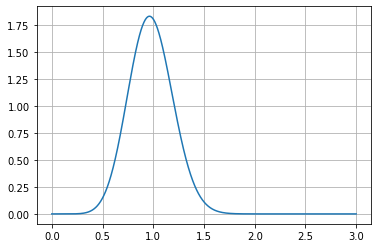

In [246]:
kappamu = KappaMu(kappa=1, mu=4, r_hat=1, numSamples=100, numSim=10**6)

# r = np.linspace(0 + 1e-50, 6, 6000)
plt.plot(kappamu.r, kappamu._pdf());
plt.grid(True)

In [247]:
kappamu.r[:5]

array([0.        , 0.00100033, 0.00200067, 0.003001  , 0.00400133])

In [248]:
kappamu.X[:5]

array([0.15900882, 0.17793388, 0.19685893, 0.21578398, 0.23470904])

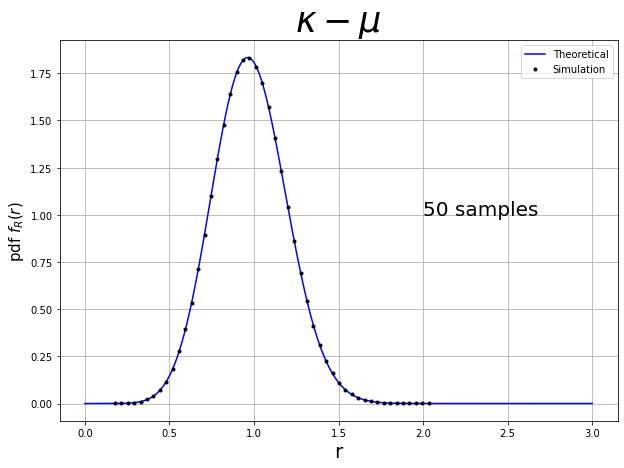

In [292]:
plt.figure(figsize=(10,7))
plt.grid(True)
plt.plot(kappamu.r, kappamu._pdf(), 'b', label='Theoretical')
plt.plot(kappamu.X[1:len(kappamu.X):2], kappamu.Y[1:len(kappamu.Y):2], "k.", label='Simulation')
plt.title(r'$\kappa-\mu$', size=35)
plt.ylabel(r'pdf $f_{R}(r)$', rotation=90, size=15)
plt.text(2, 1, '50 samples', size=20)
plt.xlabel(r'r', size=20)
plt.legend()
plt.show();